In [29]:
#### importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from matplotlib import style

In [30]:
### reading data
car_sales=pd.read_csv("car-sales-extended-missing-data.csv")

In [31]:
df=car_sales.copy()

In [32]:
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [33]:
###info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [34]:
df.shape

(1000, 5)

* **rows**:1000
* **columns**:5
- we have columns with type object and other with float type

In [35]:
### missing values
df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

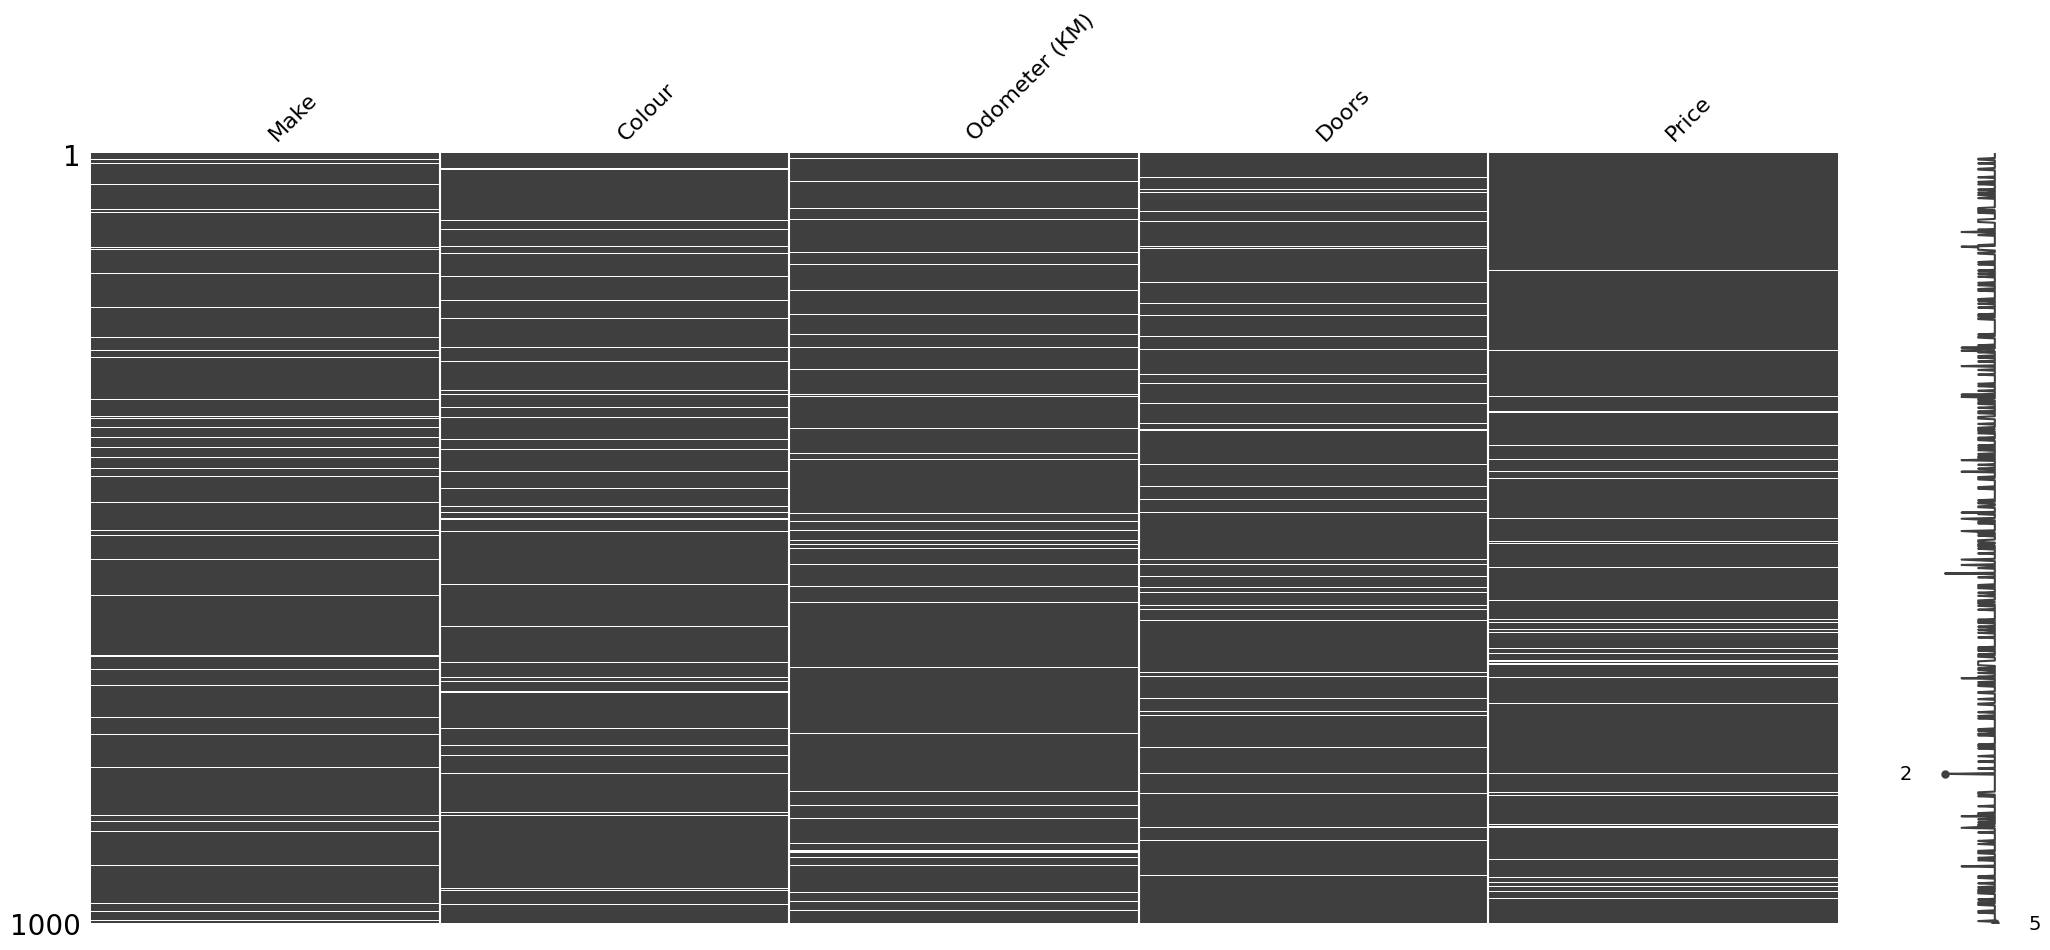

In [36]:
import missingno as msno
msno.matrix(df)
plt.show()

In [37]:
### finding dtypes of each column
df.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [38]:
from sklearn.ensemble import RandomForestRegressor
car_sales_X,car_sales_y=df.drop("Price",axis=1),df.Price
rf_regressor=RandomForestRegressor().fit(car_sales_X,car_sales_y)

ValueError: could not convert string to float: 'Honda'

**observation**:  generally models do not accept missing values
so we need to do imputation or removing missing values
and also they don't accept non numerical values


### Removing values with no labels(Nan in the Pricz column)



In [39]:
df=df.dropna(subset=['Price']).reset_index(drop=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           903 non-null    object 
 1   Colour         904 non-null    object 
 2   Odometer (KM)  902 non-null    float64
 3   Doors          903 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 37.2+ KB


In [41]:
df.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [42]:
### import Pipeline from sklearn's pipeline  module

from sklearn.pipeline import Pipeline

### import ColumnTransformer 

from sklearn.compose import ColumnTransformer

### import SimpleImputer 

from sklearn.impute import SimpleImputer

### import onehotEncoder

from sklearn.preprocessing import OneHotEncoder

### importing train_test_split 

from sklearn.model_selection import train_test_split


#### categorical values

In [ ]:
df.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [43]:
### define categorical features
categorical_features=["Make","Colour"]
### create categorical transformer Pipeline
categorical_transformer=Pipeline(steps=[
    ## set SimpleImputer strategy to "constant" and fill vallue to "missing"
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))
])

#Define Doors features
door_feature=["Doors"]

## create Doors transformer Pipeline
door_transformer=Pipeline(steps=[
    # Set SimpleImputer strategy to "constant" and fill value to 4
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))
])

#### numeric features

In [ ]:
df.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [49]:
### Define numeric features (only the Odometer (KM) column)
numeric_features=["Odometer (KM)"]

### create numeric transformer Pipeline 
numeric_transfomer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="median"))
])

In [51]:
### Setup preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
    # use the categorical_transformer to transform the categorical
    ("cat",categorical_transformer,categorical_features),
    ("door",door_transformer,door_feature),
    ("num",numeric_transfomer,numeric_features)
    ]
)

In [45]:
## import Ridge sklearn 's linear_model module

from sklearn.linear_model import Ridge

## import SVR from sklearn

from sklearn.svm import SVR

## import RandomForestRegressor 

from sklearn.ensemble import RandomForestRegressor

In [ ]:
### create dictionary of model instances
regression_models={
    "Ridge":Ridge(),
    "SVR_linear":SVR(kernel='linear'),
    "SVR_rbf":SVR(kernel="rbf"),
    "RandomForestRegressor":RandomForestRegressor()
}

regression_results={}

In [46]:
### Create car sales X data
car_sales_X=df.drop("Price",axis=1)

### create car sales y data 

car_sales_y=df["Price"]

In [47]:
from sklearn.model_selection import train_test_split

car_train_X,car_test_X,car_train_y,car_test_y=train_test_split(car_sales_X,
                                                               car_sales_y,
                                                               random_state=42)

print("X_train",car_train_X.shape)
print("X_test",car_test_X.shape)
print("y_train",car_train_y.shape)
print("y_test",car_test_y.shape)

X_train (712, 4)
X_test (238, 4)
y_train (712,)
y_test (238,)


### modeling


1. Parcourez notre dictionnaire regression_models
2. Créer un Pipeline qui contient notre préprocesseur ainsi qu'un des modèles du 
dictionnaire
3. Adapte le pipeline aux données de formation à la vente de voitures
4.  Évalue le modèle cible sur les données de test des ventes de voitures et ajoute les 
résultats à notre dictionnaire regression_results

In [52]:
### loop through the items in the regression_models dictionary
for model_name,model in regression_models.items():
    ### create a model  pipeline with a preprocessor step and model step
    model_pipeline=Pipeline(steps=[("preprocessor",preprocessor),
                                   ("model",model)])
    
    ### fit the model pipeline to the car sales training data
    print("Fitting",model_name,"...")
    model_pipeline.fit(car_train_X,car_train_y)

    print(f"Scoring {model_name}..")
    regression_results[model_name]=model_pipeline.score(car_test_X,car_test_y)



Fitting Ridge ...
Scoring Ridge..
Fitting SVR_linear ...
Scoring SVR_linear..
Fitting SVR_rbf ...
Scoring SVR_rbf..
Fitting RandomForestRegressor ...
Scoring RandomForestRegressor..


In [53]:
regression_results

{'Ridge': 0.27839317572178257,
 'SVR_linear': -0.33734842128236764,
 'SVR_rbf': -0.015909639331968872,
 'RandomForestRegressor': 0.23379475734034316}

In [54]:
### import mean_absolute_error from sklearn
from sklearn.metrics import mean_absolute_error

### import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

### import r2_score from sklearn
from sklearn.metrics import r2_score

In [58]:
### Create RidgeRegression Pipeline 
ridge_pipeline=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",Ridge())
])

ridge_pipeline.fit(car_train_X,car_train_y)

car_y_preds=ridge_pipeline.predict(car_test_X)

print(car_y_preds[:50])

[18401.27131404 22071.277167   10939.67109561  7059.07848844
  8729.19143383 10892.51790458 15313.12104602 13871.19842549
 19984.72608484 14020.66167814  6284.96245259 16504.82076088
 11740.35083656 13654.07414081 14251.49657567 16333.92621948
 15785.93993608 10025.85955605 11338.25297571 11557.24475327
 10508.36527004 13190.21087636 17768.32972185 23476.99272464
 11808.34538873 14570.26980485 18470.83991253 14480.08523566
 20358.99559156 19860.66268538 17856.35273764 22086.40571289
 12360.91889291 14196.9151905  18258.03516735 19370.10570178
 12165.25770225 12463.54509839 18580.95625891 11246.72546868
 15323.78688893 17150.55835197 19126.95494982 17150.9132028
 14881.69484526 12899.2005146  12213.39045812  8414.19353985
 15084.17758498 18418.30619628]


In [61]:
mse=mean_squared_error(car_test_y,car_y_preds)
mae=mean_absolute_error(car_test_y,car_y_preds)
r2=r2_score(car_test_y,car_y_preds)

print("mse: ",mse)
print("mse: ",mae)
print("mse: ",r2)

mse:  49443068.98259913
mse:  5668.387063014633
mse:  0.27839317572178257
